In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merged_data_removed_cols.csv')

In [3]:
df.head()


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,acousticness
0,622652,Five For Fighting,Easy Tonight,57PHqrPsX6E7OX9LeKSo9Q,37,2000,acoustic,0.470,0.2590
1,622653,Stephen Speaks,Passenger Seat,67E65R1XMIKCzRrJ3pC5IS,54,2000,acoustic,0.550,0.0237
2,622654,Chris Smither,No Love Today,6KmJfZCd5f4P11vuglbIrN,34,2000,acoustic,0.557,0.8490
3,622655,Chris Smither,Link Of Chain,16N2lpCidTNYdNq2YZhE98,35,2000,acoustic,0.445,0.8830
4,622656,Bob Schneider,Big Blue Sea,4maIlg3dss7yA23mBdTYdM,27,2000,acoustic,0.671,0.5540


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1048575 non-null  int64  
 1   artist_name   1048560 non-null  object 
 2   track_name    1048542 non-null  object 
 3   track_id      1048575 non-null  object 
 4   popularity    1048575 non-null  int64  
 5   year          1048575 non-null  int64  
 6   genre         1048575 non-null  object 
 7   danceability  1048575 non-null  float64
 8   acousticness  1048575 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 72.0+ MB


dữ liệu có 9 cột

    

        genre  popularity
13    country   33.324242
27       folk   33.707804
45  indie-pop   35.867453
66        sad   36.426972
2    alt-rock   38.718804
49      metal   39.811996
14      dance   43.092966
63       rock   46.188525
42    hip-hop   46.685289
56        pop   55.984232


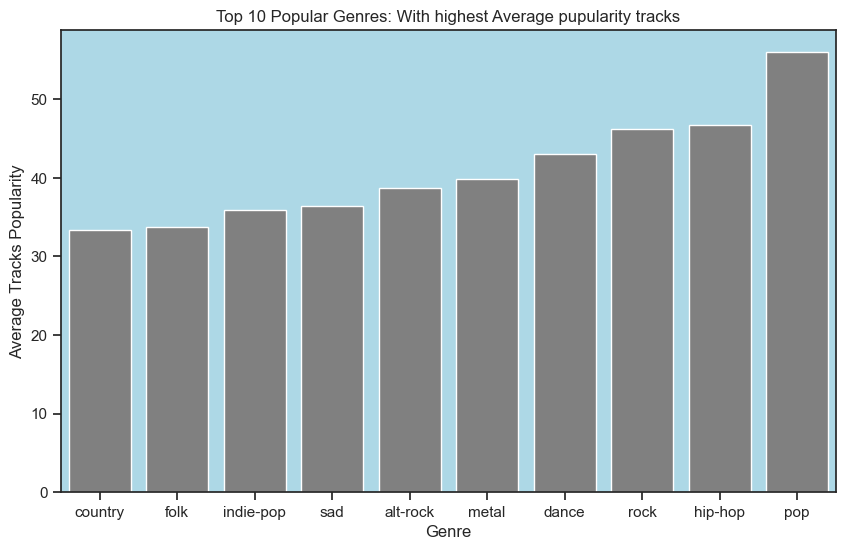

In [5]:
top10_genres = df[['genre', 'track_name', 'popularity']]

# Tính trung bình độ phổ biến của các thể loại
top10_genres_average_popularity = (
    top10_genres.groupby('genre')['popularity']
    .mean()
    .reset_index()
    .sort_values(by='popularity', ascending=True)
    .tail(10)
)

print(top10_genres_average_popularity)

plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor': 'lightblue'})
sns.barplot(x='genre', y='popularity', data=top10_genres_average_popularity, color="grey")

plt.title('Top 10 Popular Genres: With highest Average pupularity tracks')
plt.xlabel('Genre')
plt.ylabel('Average Tracks Popularity')

plt.show()

Number of Tracks in Each Year:
    year  NumTracks
0   2000      44034
1   2001      42351
2   2002      42102
3   2003      42368
4   2004      43390
5   2005      43780
6   2006      45474
7   2007      46001
8   2008      47432
9   2009      28992
10  2012      54797
11  2013      53216
12  2014      53179
13  2015      51607
14  2016      40273
15  2017      56241
16  2018      56572
17  2019      55793
18  2020      55066
19  2021      53566
20  2022      53692
21  2023      38649
The year with the highest tracks released :  2018
The year with the Lowest tracks released :  2009


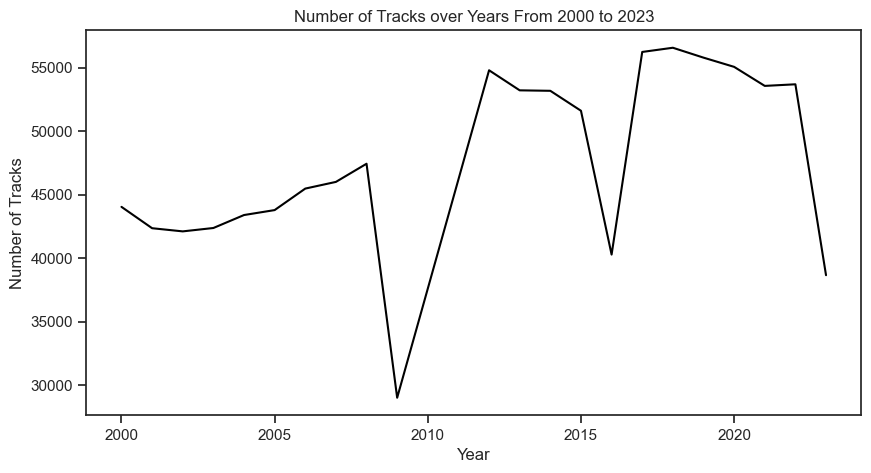

In [8]:
#Số lượng bài hát qua các năm
import matplotlib.pyplot as plt
import seaborn as sns
count_tracks = df.groupby(['year', 'track_id']).size().reset_index(name='Count')

track_count_per_year = count_tracks.groupby('year')['track_id'].nunique().reset_index(name='NumTracks')

print("Number of Tracks in Each Year:")
print(track_count_per_year)

Highest_year = track_count_per_year.loc[track_count_per_year['NumTracks'].idxmax(), 'year']
print("The year with the highest tracks released : ", Highest_year)

Lowest_year = track_count_per_year.loc[track_count_per_year['NumTracks'].idxmin(), 'year']
print("The year with the Lowest tracks released : ", Lowest_year)

plt.figure(figsize=(10, 5))
sns.set(style="ticks", rc={'axes.facecolor':'white'})
sns.lineplot(x='year', y='NumTracks', data=track_count_per_year, color='black')
plt.title('Number of Tracks over Years From 2000 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()

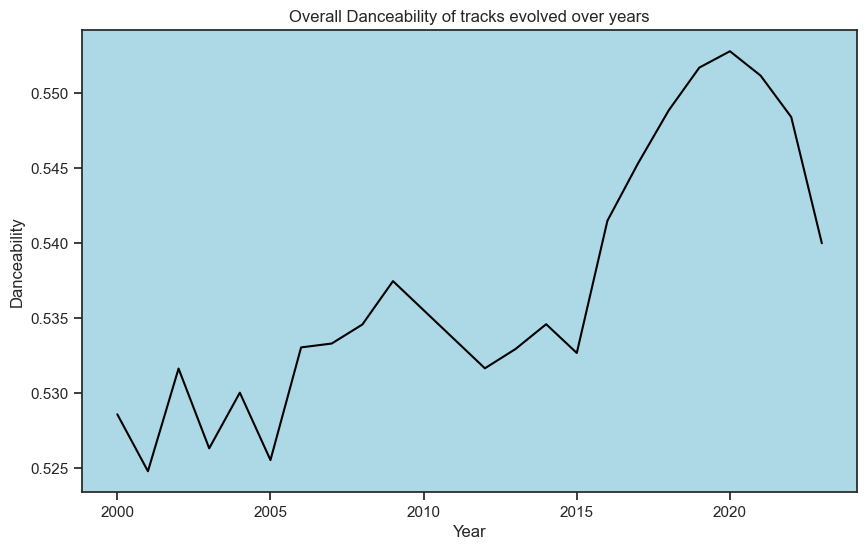

'Âm nhạc phát triển và hầu như tăng trong các năm nhưng đến năm 2019 do dịch covid nên đã bị ảnh hưởng đến nền âm nhạc khiến cho số lượng bài hát giảm '

In [10]:
#Sự phát triển nhạc qua các năm
danceability_over_years = df[['year','track_name','danceability']]
danceability_over_years_avg = danceability_over_years.groupby('year')['danceability'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set(style="ticks", rc={'axes.facecolor':'lightblue'})
sns.lineplot(x='year', y='danceability', data=danceability_over_years_avg, color="black")

plt.title('Overall Danceability of tracks evolved over years')
plt.xlabel('Year')
plt.ylabel('Danceability')

plt.show()
"""Âm nhạc phát triển và hầu như tăng trong các năm nhưng đến năm 2019 do dịch covid nên đã bị ảnh hưởng đến nền âm nhạc khiến cho số lượng bài hát giảm """